Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing Dataset

In [9]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
y = y.reshape(len(y), 1)  # transform into 2d array to apply feature scaling
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

# since salary and level have different mean that is why we created 2 instances
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVR model on the whole data set

In [11]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X,y)

e:\Courses\Machine-Learning-A-Z\Python\env\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

predicting a new result

In [12]:
sc_y.inverse_transform(
    regressor.predict(sc_X.transform([[6.5]])).reshape(-1, 1)
)  # avoidformat error

array([[170370.0204065]])

Visualising the SVR results

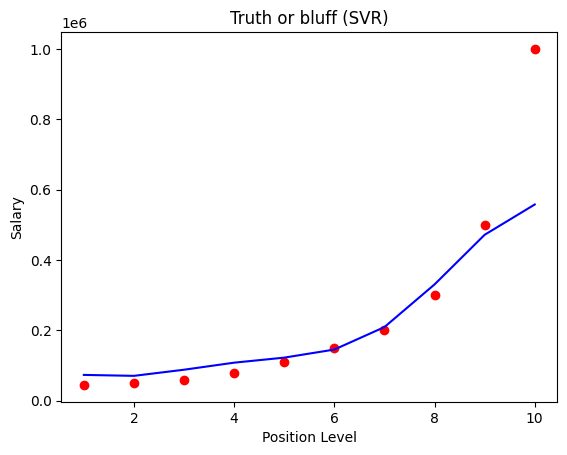

In [13]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(
    sc_X.inverse_transform(X),
    sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)),
    color="blue",
)
plt.title("Truth or bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

Visualizing with high resolution and smoother curve

C:\Users\omarh\AppData\Local\Temp\ipykernel_14888\2532240064.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


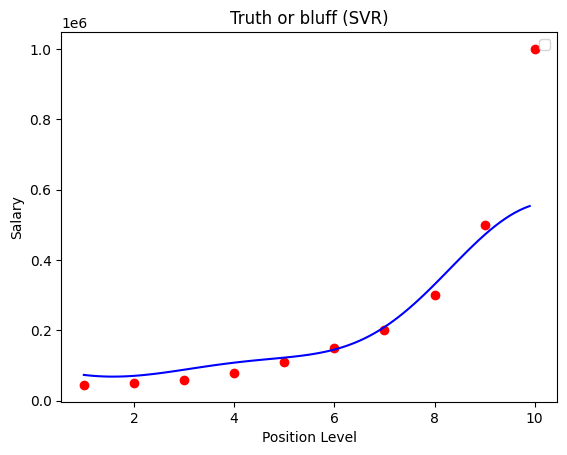

In [14]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color="red")
plt.plot(
    X_grid,
    sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)),
    color="blue",
)
plt.title("Truth or bluff (SVR)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.legend()  # Show legend for different plots
plt.show()